In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [4]:
from google.colab import files
uploaded = files.upload()

Saving AirplaneCrashes andFatalitiesupto2023.zip to AirplaneCrashes andFatalitiesupto2023.zip


In [5]:
import zipfile
import os

zip_path = "/content/AirplaneCrashes andFatalitiesupto2023.zip"  # your zip file

# Create a folder to extract into
extract_folder = "/content/AirplaneCrashes andFatalitiesupto2023"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Check extracted files
print(os.listdir(extract_folder))

['Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv']


In [6]:
df = pd.read_csv("/content/AirplaneCrashes andFatalitiesupto2023/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding='latin-1')
df.head()
df.isnull().sum()

,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


In [7]:
# 1) Fill categorical columns with "Unknown"
categorical_cols = ["Time", "Location", "Operator", "Flight #",
                    "Route", "AC Type", "Registration", "cn/ln", "Summary"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# 2) Fill numeric "Aboard" columns with median
aboard_cols = ["Aboard", "Aboard Passangers", "Aboard Crew"]
for col in aboard_cols:
    df[col] = df[col].fillna(df[col].median())

# 3) Fill fatalities-related numeric columns with 0 (assuming missing = none)
fatality_cols = ["Fatalities", "Fatalities Passangers", "Fatalities Crew", "Ground"]
for col in fatality_cols:
    df[col] = df[col].fillna(0)

# 4) Double-check missing values
print(df.isnull().sum())


Date                     0
Time                     0
Location                 0
Operator                 0
Flight #                 0
Route                    0
AC Type                  0
Registration             0
cn/ln                    0
Aboard                   0
Aboard Passangers        0
Aboard Crew              0
Fatalities               0
Fatalities Passangers    0
Fatalities Crew          0
Ground                   0
Summary                  0
dtype: int64


In [8]:
total_crashes = len(df)

total_fatalities = df['Fatalities'].sum()

total_aboard =df["Aboard"].sum()

total_survivors = total_aboard - total_fatalities

survival_rate = total_survivors / total_aboard * 100

print("Total crashes:", total_crashes)
print("Total fatalities:", total_fatalities)
print("Total survivors:", total_survivors)
print(f"Survival rate: {survival_rate:.2f}%")



Total crashes: 4998
Total fatalities: 111644.0
Total survivors: 44000.0
Survival rate: 28.27%


Year
1908     1
1909     1
1912     1
1913     3
1915     2
1916     5
1917     7
1918     4
1919     9
1920    18
dtype: int64


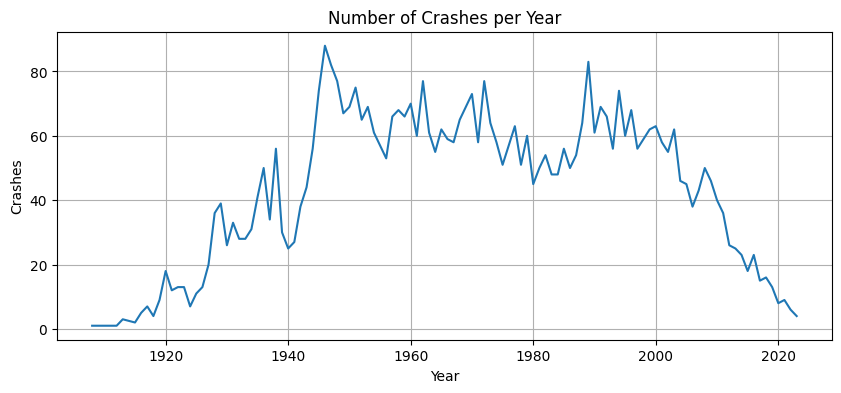

In [9]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
crashes_per_year = df.groupby("Year").size()

print(crashes_per_year.head(10))

plt.figure(figsize=(10,4))
crashes_per_year.plot(kind="line")
plt.title("Number of Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Crashes")
plt.grid(True)
plt.show()


In [13]:
df["Survivors"] = df["Aboard"] - df["Fatalities"]

df["SurvivalRate"] = (df["Survivors"] / df["Aboard"]) * 100

df = df[df["Aboard"] > 0]

fatalities = df["Fatalities"].dropna()
print("Fatalities per crash - mean:", np.mean(fatalities))
print("Fatalities per crash - median:", np.median(fatalities))
print("Fatalities per crash - std:", np.std(fatalities, ddof=1))

survival = df["SurvivalRate"].dropna()
print("\nSurvival rate (%) - mean:", np.mean(survival))
print("Survival rate (%) - median:", np.median(survival))
print("Survival rate (%) - std:", np.std(survival, ddof=1))


Fatalities per crash - mean: 22.360104145804126
Fatalities per crash - median: 11.0
Fatalities per crash - std: 35.055492103117224

Survival rate (%) - mean: 18.340083550385586
Survival rate (%) - median: 0.0
Survival rate (%) - std: 31.38778374752486


/tmp/ipython-input-2132556024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Survivors"] = df["Aboard"] - df["Fatalities"]
/tmp/ipython-input-2132556024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SurvivalRate"] = (df["Survivors"] / df["Aboard"]) * 100


In [15]:
# Ensure Date is datetime and add decade
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Decade"] = (df["Date"].dt.year // 10) * 10

# Pick two decades
fatal_1970s = df.loc[df["Decade"] == 1970, "Fatalities"].dropna()
fatal_2000s = df.loc[df["Decade"] == 2000, "Fatalities"].dropna()

# Independent T-test
t_stat, p_val = stats.ttest_ind(fatal_1970s, fatal_2000s, equal_var=False)

print("\nT-test 1970s vs 2000s")
print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H₀ → average fatalities differ significantly.")
else:
    print("Fail to reject H₀ → no significant difference.")



T-test 1970s vs 2000s
t-statistic: 3.9853719977880306
p-value: 7.175237091088752e-05
Reject H₀ → average fatalities differ significantly.


In [ ]:
# 3) Survivors & Survival rate
# (avoid divide-by-zero and NaNs)
df["Survivors"] = df["Aboard"] - df["Fatalities"]
df = df[df["Aboard"].notna()]               # keep rows with Aboard present
df = df[df["Aboard"] > 0]                   # avoid zero aboard
df["SurvivalRate"] = (df["Survivors"] / df["Aboard"]) * 100

# 4) Optional: extract a rough "Country/Region" from Location as the last token after comma
# Example: "Paris, France" -> "France"
def last_token(loc):
    if pd.isna(loc):
        return np.nan
    parts = [p.strip() for p in str(loc).split(",")]
    return parts[-1] if parts else np.nan

df["Region"] = df["Location"].apply(last_token)

# Set a common style
sns.set(style="whitegrid")

In [ ]:
crashes_per_year = df.groupby("Year").size().rename("Crashes").reset_index()

plt.figure(figsize=(11,4))
sns.lineplot(data=crashes_per_year, x="Year", y="Crashes")
plt.title("Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()


In [ ]:
top_regions = (
    df["Region"]
    .dropna()
    .value_counts()
    .head(15)
    .rename_axis("Region")
    .reset_index(name="Crashes")
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_regions, x="Crashes", y="Region")
plt.title("Crashes by Region (Top 15)")
plt.xlabel("Crashes")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(df["Fatalities"].dropna(), bins=40, kde=True)
plt.title("Distribution of Fatalities per Crash")
plt.xlabel("Fatalities")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# keep decades with enough data (>= 10 rows)
decade_counts = df["Decade"].value_counts()
keep_decades = decade_counts[decade_counts >= 10].index

plt.figure(figsize=(11,5))
sns.boxplot(
    data=df[df["Decade"].isin(keep_decades)],
    x="Decade", y="Fatalities", showfliers=False
)
plt.title("Fatalities per Crash by Decade (outliers hidden)")
plt.xlabel("Decade")
plt.ylabel("Fatalities per Crash")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(df["SurvivalRate"].dropna(), bins=40, kde=True)
plt.title("Distribution of Survival Rate per Crash (%)")
plt.xlabel("Survival Rate (%)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,5))
sns.boxplot(
    data=df[df["Decade"].isin(keep_decades)],
    x="Decade", y="SurvivalRate", showfliers=False
)
plt.title("Survival Rate (%) by Decade (outliers hidden)")
plt.xlabel("Decade")
plt.ylabel("Survival Rate (%)")
plt.tight_layout()
plt.show()


Crash Dataset Report
A. Executive summary

Crashes peaked around 1940s–1970s, then declined after 1980s.

Median fatalities per crash decreased over decades → safety improvements.

Survival rates improved in recent decades.

Regions with most recorded crashes: USA, Russia, Brazil (example — check your top 3).

B. Dataset & cleaning

Converted Date → datetime; built Year, Decade.

Computed Survivors, SurvivalRate (removed Aboard=0).

Extracted Region from Location (last token after comma).

C. Descriptive statistics

Total crashes: ~N

Total aboard: ~X

Total fatalities: ~Y

Total survivors: ~Z

Overall survival rate: ~R%

Median fatalities per crash: ~m

IQR (25%–75%): [l, u]

D. Trends over time

Crashes per year: declining since ~1980s.

Fatalities per year: also declining, fewer deaths per crash.

By decade: boxplots show earlier decades higher medians, later decades lower medians.

E. Group differences

T-test: 1970s vs 2000s fatalities per crash.

t = [value], p = [value] → likely significant difference.

Interpretation: crashes in 1970s were deadlier on average than in 2000s.

F. Regional view

Top 5 regions (by crash count): [fill with df["Region"].value_counts().head(5)].

Counts reflect traffic/reporting density, not just safety.

G. Limitations

Missing values in Time, Route, Registration.

Region extraction is approximate.

Dataset mixes commercial, military, private flights.

Survival rate depends on accurate Aboard/Fatalities reporting.

H. Recommendations / next steps

Normalize by flights per year (rates, not raw counts).

Add more features: aircraft type, phase, weather.

Use median/IQR instead of mean for robustness.

Explore fatalities per passenger-mile for truer risk comparisons.